# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pandas
data = pandas.read_csv('preprocessed_data.csv' , nrows = 55000)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [3]:
# train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [4]:
features_list1 = []
features_list2 = []

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [5]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
# BOW
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
features_list1 = features_list1 + vectorizer.get_feature_names()

#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 10 , ngram_range = (1,4) , max_features = 5000)
vectorizer.fit(X_train['essay'])
X_train_essay_tfidf = vectorizer.transform(X_train['essay'])
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

features_list2 = features_list2 + vectorizer.get_feature_names()

(24689, 8) (24689,)
(12161, 8) (12161,)
(18150, 8) (18150,)
After vectorizations
(24689, 5000) (24689,)
(12161, 5000) (12161,)
(18150, 5000) (18150,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# school_state encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) 


X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()


After vectorizations
(24689, 51) (24689,)
(12161, 51) (12161,)
(18150, 51) (18150,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [7]:
# teacher_prefix encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 


X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 5) (24689,)
(12161, 5) (12161,)
(18150, 5) (18150,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [8]:
# project_grade_category encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)


X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 4) (24689,)
(12161, 4) (12161,)
(18150, 4) (18150,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [9]:
# clean_categories encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) 


X_train_clean_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 7) (24689,)
(12161, 7) (12161,)
(18150, 7) (18150,)
['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']


In [10]:
# clean_subcategories encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) 

X_train_clean_subcat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat.shape, y_train.shape)
print(X_cv_clean_subcat.shape, y_cv.shape)
print(X_test_clean_subcat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 28) (24689,)
(12161, 28) (12161,)
(18150, 28) (18150,)
['appliedsciences', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts']


In [11]:
# for price encoding
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 1) (24689,)
(12161, 1) (12161,)
(18150, 1) (18150,)


In [12]:
# for teacher_number_of_previously_posted_projects encoding
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_prev_post_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_cv_prev_post_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_prev_post_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)



print("After vectorizations")
print(X_train_prev_post_norm.shape, y_train.shape)
print(X_cv_prev_post_norm.shape, y_cv.shape)
print(X_test_prev_post_norm.shape, y_test.shape)
print("="*100)

features_list1 = features_list1 + vectorizer.get_feature_names()
features_list2 = features_list2 + vectorizer.get_feature_names()

After vectorizations
(24689, 1) (24689,)
(12161, 1) (12161,)
(18150, 1) (18150,)


In [13]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm,X_train_prev_post_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cat,X_cv_clean_subcat, X_cv_price_norm,X_cv_prev_post_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat,X_test_clean_subcat, X_test_price_norm,X_test_prev_post_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)



Final Data matrix
(24689, 5097) (24689,)
(12161, 5097) (12161,)
(18150, 5097) (18150,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

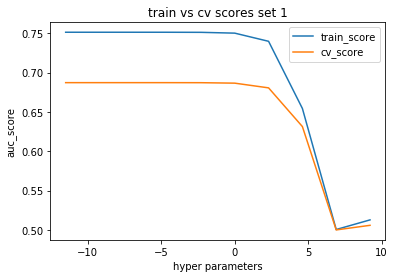

In [15]:
import math
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.metrics import roc_auc_score
alphas = []
train_scores = []
cv_scores = []
init = [10**i for i in range(-5 , 5 , 1)]
for a in init:
    alphas.append(math.log(a))
    model = mnb(alpha = a,class_prior = [0.5 , 0.5])
    model.fit(X_tr , y_train)
    train_proba = model.predict_proba(X_tr)
    cv_proba = model.predict_proba(X_cr)
    train_score = roc_auc_score(y_train , train_proba[:,1])
    cv_score = roc_auc_score(y_cv,cv_proba[:,1])
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(alphas , train_scores , label = 'train_score')
plt.plot(alphas , cv_scores , label = 'cv_score')
plt.title('train vs cv scores set 1')
plt.xlabel('hyper parameters')
plt.ylabel('auc_score')
plt.legend()
plt.show()        

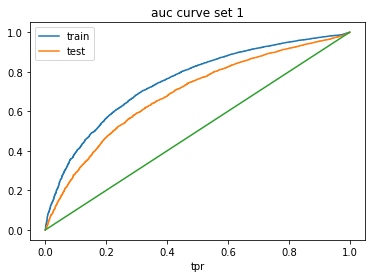

In [16]:
from sklearn import metrics
model = mnb(alpha = 10**-5 , class_prior = [0.5 , 0.5])
model.fit(X_tr , y_train)
proba = model.predict_proba(X_tr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, proba[:,1])
proba = model.predict_proba(X_te)
plt.plot(fpr , tpr , label = 'train')
fpr, tpr, thresholds = metrics.roc_curve(y_test ,proba[:,1])
plt.plot(fpr , tpr , label = 'test')
plt.xlabel('fpr')
plt.xlabel('tpr')
plt.title('auc curve set 1')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()
set1_auc = metrics.auc(fpr , tpr)

In [17]:
from sklearn.metrics import confusion_matrix
print("Set 1\n",confusion_matrix(y_test, model.predict(X_te)))


Set 1
 [[ 1724  1177]
 [ 4801 10448]]


### modelling for set 2

In [18]:
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm,X_train_prev_post_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cat,X_cv_clean_subcat, X_cv_price_norm,X_cv_prev_post_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat,X_test_clean_subcat, X_test_price_norm,X_test_prev_post_norm)).tocsr()


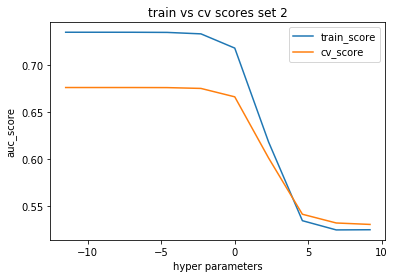

In [19]:
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.metrics import roc_auc_score
alphas = []
train_scores = []
cv_scores = []
init = [10**i for i in range(-5, 5 , 1)]
for a in init:
    alphas.append(math.log(a))
    model = mnb(alpha = a , class_prior = [0.5 , 0.5])
    model.fit(X_tr , y_train)
    train_proba = model.predict_proba(X_tr)
    cv_proba = model.predict_proba(X_cr)
    train_score = roc_auc_score(y_train , train_proba[:,1])
    cv_score = roc_auc_score(y_cv,cv_proba[:,1])
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(alphas , train_scores , label = 'train_score')
plt.plot(alphas , cv_scores , label = 'cv_score')
plt.title('train vs cv scores set 2')
plt.xlabel('hyper parameters')
plt.ylabel('auc_score')
plt.legend()
plt.show()   

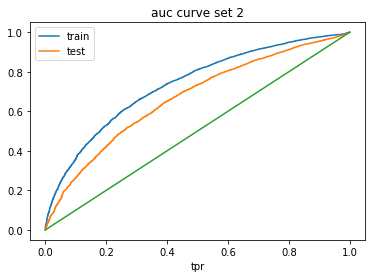

In [20]:
from sklearn import metrics
model2 = mnb(alpha = 10**-5 , class_prior = [0.5 , 0.5])
model2.fit(X_tr , y_train)
proba = model2.predict_proba(X_tr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, proba[:,1])
proba = model2.predict_proba(X_te)
plt.plot(fpr , tpr , label = 'train')
fpr, tpr, thresholds = metrics.roc_curve(y_test ,proba[:,1])
plt.plot(fpr , tpr , label = 'test')
plt.xlabel('fpr')
plt.xlabel('tpr')
plt.title('auc curve set 2')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()
set2_auc = metrics.auc(fpr , tpr)

In [22]:
from sklearn.metrics import confusion_matrix
print("Set 2\n",confusion_matrix(y_test, model.predict(X_te)))

Set 2
 [[    0  2901]
 [    0 15249]]


### most important features in the set 1

In [23]:
final_list1 = []
indexes = list(np.argsort(abs(model.feature_log_prob_[0])))[::-1]
for i in range(0,20):
    final_list1.append(features_list1[indexes[i]])

In [24]:
print("for set 1",final_list1)

for set 1 ['wobble cushions', 'balance ball', 'maps', 'erase boards', 'dry erase boards', 'books allow', 'dash', 'waste', 'pedometers', 'chairs allow', 'edit', 'subscription', 'classroom rug', 'chairs help', 'dry erase markers', 'these chairs', 'basketballs', 'the wobble', 'balance balls', 'chromebooks classroom']


In [27]:
final_list2 = []
indexes = list(np.argsort(abs(model.feature_log_prob_[1])))[::-1]
for i in range(0,20):
    final_list2.append(features_list1[indexes[i]])

In [28]:
print("for set 1",final_list2)

for set 1 ['dr', 'wy', 'many raised single parent', 'school day by', 'by creative positive', 'by creative positive way', 'early life', 'by creative', 'inspire even', 'creative positive way hopeful', 'however certainly control experience', 'lives however certainly control', 'certainly control experience school', 'us see', 'may prevent', 'earliest learners', 'simple provide students creative', 'however certainly control', 'control experience school', 'control experience school day']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [30]:
#copied from here : https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'model' , 'hyperparameter' , 'auc'])
t.add_row(['BOW', 'Multinomial NB' , '10^-5' ,  set1_auc])
t.add_row(['TF-IDF', 'Multinomial NB' , '10^-5' , set2_auc ])
print(t)

+------------+----------------+----------------+--------------------+
| Vectorizer |     model      | hyperparameter |        auc         |
+------------+----------------+----------------+--------------------+
|    BOW     | Multinomial NB |     10^-5      | 0.6880042472707848 |
|   TF-IDF   | Multinomial NB |     10^-5      | 0.667914141961807  |
+------------+----------------+----------------+--------------------+


array([[0.00312095],
       [0.02344104],
       [0.00098585],
       ...,
       [0.00125101],
       [0.00106651],
       [0.00067339]])